# Summit AWAKEN Layout

In [1]:
# Load the amrwind-frontend module
amrwindfedir = '/projects/wind_uq/lcheung/amrwind-frontend'  # Location of amrwind-frontend 

import sys, os
sys.path.insert(1, amrwindfedir)

# Load the libraries
import amrwind_frontend  as amrwind
import matplotlib.pyplot as plt
import numpy             as np
import math

# Also ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Make all plots inline 
%matplotlib inline

/projects/wind_uq/lcheung/naluhelperscripts/venv/lib/python2.7/site-packages/subprocess32.py:149: RuntimeWarning: The _posixsubprocess module is not being used. Child process reliability may suffer if your program uses threads.
  "program uses threads.", RuntimeWarning)


In [2]:
# Add this to load local packages
import sys
sys.path.insert(1, '/ascldap/users/lcheung/.local/lib/python2.7/site-packages')
import utm
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
# Load the data from the database of all turbines
df = pd.read_csv('/projects/AWAKEN/lcheung/awaken.github/ThunderRanchCoords/uswtdb_v3_3_20210114.csv',low_memory=False)

In [4]:
turbines=[]
addKingPlains     = True
addArmadilloFlats = True
addThunderRanch   = False
addBreckinridge   = True
addChisholmView   = False

### King Plains turbines

In [5]:
KPturbs1=df[df['p_name']=="unknown Noble County"]
KPturbs2=df[df['p_name']=="unknown Garfield County"]

KPcount = 0

if addKingPlains:
    ge2p8='GE2.8-127'
    turblist = []
    # Turbines from Noble County
    for index, row in KPturbs1.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        turbines.append(datarow)
        KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    # Turbines from Garfield County
    for index, row in KPturbs2.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':row['faa_asn'].replace('OE','KP'), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':ge2p8}
        if utmxy[1]>4020000:  # Remove the ones from Armadillo Ranch
            turbines.append(datarow)    
            KPcount += 1
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        
    print("King Plains: %i turbines"%(KPcount))
    print('Turbine types: '+repr(turblist))

King Plains: 88 turbines
Turbine types: ['GE2.8-127']


### Armadillo flats turbines

In [6]:
AFturbs=df[df['p_name']=="Armadillo Flats"]

In [7]:
if addArmadilloFlats:
    turblist = []
    # Turbines from Armadillo Flats
    for index, row in AFturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','AF').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    
    print("Armadillo Flats: %i turbines"%(len(AFturbs)))
    print('Turbine types: '+repr(turblist))

Armadillo Flats: 109 turbines
Turbine types: ['GE1.79-100', 'GE1.715-103', 'GE2.3-116']


## Thunder Ranch turbines

In [8]:
TRturbs=df[df['p_name']=="Thunder Ranch"]

In [9]:
if addThunderRanch:
    turblist = []
    for index, row in TRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','TR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Thunder Ranch: %i turbines"%(len(TRturbs)))
    print('Turbine types: '+repr(turblist))

## Breckenridge turbines

In [10]:
BRturbs=df[df['p_name']=="Breckinridge"]

In [11]:
if addBreckinridge:
    turblist = []
    for index, row in BRturbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','BR').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
    print("Breckinridge: %i turbines"%(len(BRturbs)))
    print('Turbine types: '+repr(turblist))

Breckinridge: 57 turbines
Turbine types: ['GE1.7-103']


## Add Chisholm View

In [12]:
CV1turbs=df[df['p_name']=="Chisholm View"]
CV2turbs=df[df['p_name']=="Chisholm View II"]

In [13]:
CVcount = 0

if addChisholmView:
    turblist = []
    for index, row in CV1turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    for index, row in CV2turbs.iterrows():
        utmxy   = utm.from_latlon(row['ylat'], row['xlong'])
        datarow = {'faa_asn':str(row['faa_asn']).replace('OE','CV').replace('nan','T'+str(index)), 
                   'lat':row['ylat'], 'long':row['xlong'], 'utm':(utmxy[0], utmxy[1]), 
                   't_model':row['t_model']}
        turbines.append(datarow)   
        if datarow['t_model'] not in turblist: turblist.append(datarow['t_model'])
        CVcount += 1
    print("Chisholm View: %i turbines"%(CVcount))
    print('Turbine types: '+repr(turblist))

In [14]:
print("Total turbines: %i"%(len(turbines)))

Total turbines: 254


### Write the CSV file

In [15]:
summitcsv = 'SummitLayout_Stable1.csv'

verbose=True

# CSV file should have columns with
# name, x, y, type, yaw, hubheight, options
header="""# name, x, y, type, yaw, hubheight, options"""
with open(summitcsv, 'w') as f:
    f.write(header+'\n')
    if verbose: print(header)
    for x in turbines: 
        #line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['lat'], x['long'], 'Summit_'+x['t_model'])
        line='%s, %f, %f, %s, , ,'%(x['faa_asn'], x['utm'][0], x['utm'][1], 'Summit_'+x['t_model'])
        f.write(line+'\n')
        if verbose: print(line)

# name, x, y, type, yaw, hubheight, options
2019-WTW-4713-KP, 644600.601753, 4027108.285963, Summit_GE2.8-127, , ,
2019-WTW-4655-KP, 642097.122368, 4030694.510509, Summit_GE2.8-127, , ,
2019-WTW-4651-KP, 640524.009474, 4030645.516444, Summit_GE2.8-127, , ,
2019-WTW-4726-KP, 647045.619630, 4026325.291169, Summit_GE2.8-127, , ,
2019-WTW-4671-KP, 643717.500753, 4029868.723641, Summit_GE2.8-127, , ,
2019-WTW-4715-KP, 641404.515835, 4025585.036081, Summit_GE2.8-127, , ,
2019-WTW-4691-KP, 640525.539569, 4027810.309735, Summit_GE2.8-127, , ,
2019-WTW-7913-KP, 638938.794021, 4027387.685619, Summit_GE2.8-127, , ,
2019-WTW-4657-KP, 642927.453405, 4030718.728327, Summit_GE2.8-127, , ,
2019-WTW-4694-KP, 641659.228636, 4028640.259465, Summit_GE2.8-127, , ,
2019-WTW-4718-KP, 642621.397465, 4025659.569623, Summit_GE2.8-127, , ,
2019-WTW-4690-KP, 640175.944241, 4027374.995134, Summit_GE2.8-127, , ,
2019-WTW-4656-KP, 642480.917060, 4030612.715718, Summit_GE2.8-127, , ,
2019-WTW-4697-KP, 642940.656099, 

## AWAKEN Wind farm layout for Summit

**Note**: to make sure that the correct turbines are in place for setting up this layout file, make sure something like this file is in place:

In [16]:
with open(amrwindfedir+"/turbines/summitlayoutturbs.yaml")as f: print(f.read())

turbines:
  Summit_GE1.68-82.5:
    turbinetype_name:    "Summit_GE1.68-82.5"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      82.5
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.715-103:
    turbinetype_name:    "Summit_GE1.715-103"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      103
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.715-103:
    turbinetype_name:    "Summit_GE1.715-103"
    turbinetype_comment: "Dummy layout"
    Actuator_type:       UniformCtDisk
    Actuator_rotor_diameter:      103
    Actuator_hub_height:          80
    Actuator_thrust_coeff:        0.6
    Actuator_epsilon:             [5.0]
  Summit_GE1.79-100:
    turbinetype_name:    "Summit_GE1.79-100"
    turbinetype_comment

In [17]:
# Start the AMR-Wind case
case = amrwind.MyApp.init_nogui()

Cannot load /projects/wind_uq/lcheung/amrwind-frontend/turbines/IEA15MW_RWT.yaml


In [45]:
WS     = 10.5            # Wind speed, m/s
WDir   = 175           # Wind direction, degrees
farm_domainsize = [42000, 35000, 800]
farm_center     = [630500, 4023000]   # In utm
#print(utm.from_latlon(36.587395, -97.756294))
#farm_center          = utm.to_latlon(640000, 4030000, 14, 'S')
print("Farm center = "+repr(farm_center)) # in lat/long
farm_background_mesh = 10 #20

Farm center = [630500, 4023000]


In [46]:
case.setAMRWindInput('useWSDir', True)
case.setAMRWindInput('ABL_windspeed', WS, forcechange=True)
case.setAMRWindInput('ABL_winddir',   WDir, forcechange=True)
case.ABL_calculateWindVector()

In [47]:
# Some random stuff
case.setAMRWindInput('incflo.physics', ['FreeStream', 'Actuator'])
case.setAMRWindInput('time.fixed_dt', 0.1)

In [48]:
case.loadTurbineCSVFile(summitcsv)

In [49]:
case.setAMRWindInput('turbines_coordsys', 'utm')

# Set up the domain 
case.setAMRWindInput('turbines_domainsize',         farm_domainsize)
case.setAMRWindInput('turbines_backgroundmeshsize', farm_background_mesh)
case.setAMRWindInput('turbines_autocalccenter',     False)
case.setAMRWindInput('turbines_farmcenter',         [farm_center[0], farm_center[1]])
case.setAMRWindInput('turbines_deleteprev', True)

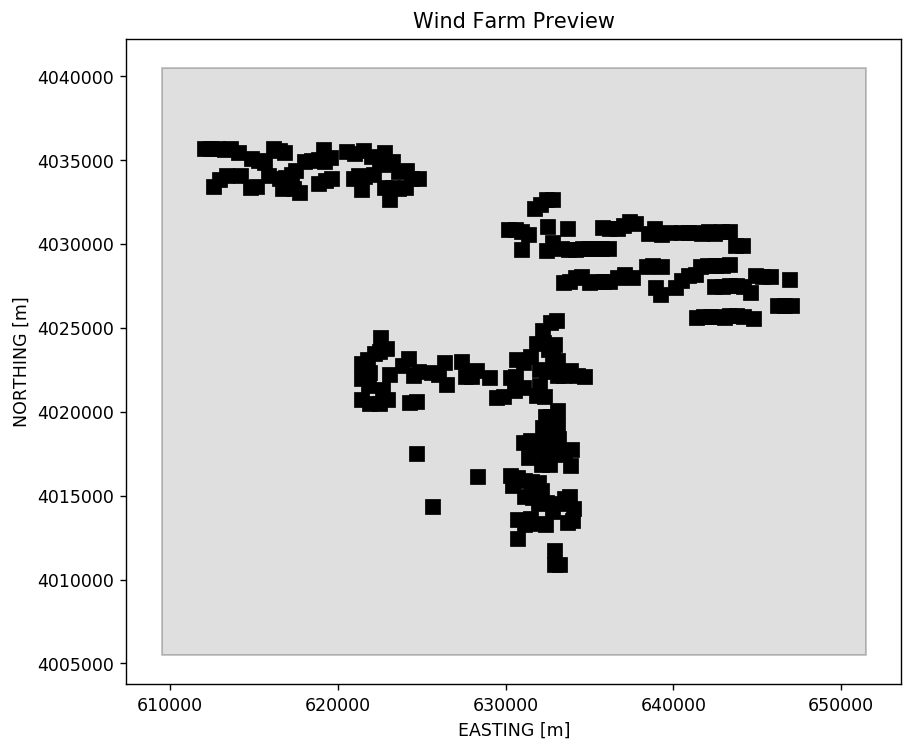

In [50]:
# Preview the turbine layout
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=125)
case.setAMRWindInput('turbines_plotnames', False)
case.turbines_previewAllTurbines(ax=ax)

In [51]:
case.getAMRWindInput('turbines_farmcenter')

[630500.0, 4023000.0]

In [52]:
case.turbines_createAllTurbines()

# Print out existing list of turbines, just to confirm that the turbines got made
#print(case.listboxpopupwindict['listboxactuator'].getitemlist())

## Add refinements

In [59]:
refinementcsv="""
# CSV file should have columns with
# level, upstream, downstream, lateral, below, above, options
level, upstream, downstream, lateral, below, above, options
#0,     13800,    15000,      18500,  100,  250,      center:farm units:meter
0,     13800,    15000,      18500,  100,  350, center:specified units:meter centerx:630500 centery:4023000 centerz:100
#1,     20000,    25000,      30000,  100,  500,   center:farm units:meter
1,   6500,    4500,    9000,  100,  200, center:specified units:meter centerx:639000 centery:4030000 centerz:100 name:KP
1,  8800,    9000,    9000,  100,  200, center:specified units:meter centerx:627000 centery:4018000 centerz:100 name:AF
1,   3700,    1900,     6500,  100,  200, center:specified units:meter centerx:618500 centery:4035000 centerz:100 name:BR
#1,  10000,    5000,    14000,  100,  400, center:specified units:meter centerx:618000 centery:4050000 centerz:100 name:CV
#1,  10000,    7500,    20000,  100,  400, center:specified units:meter centerx:653000 centery:4050000 centerz:100 name:TR
#2,     0.5,  0.5, 0.5, 0.525, 0.525, #take out if L1 is 2.5 m -units D
"""
case.setAMRWindInput('refine_csvtextbox', refinementcsv)
case.setAMRWindInput('refine_deleteprev', True)

In [60]:
case.refine_createAllZones()

(607400.0, 653600.0, 4003750.0, 4042250.0)

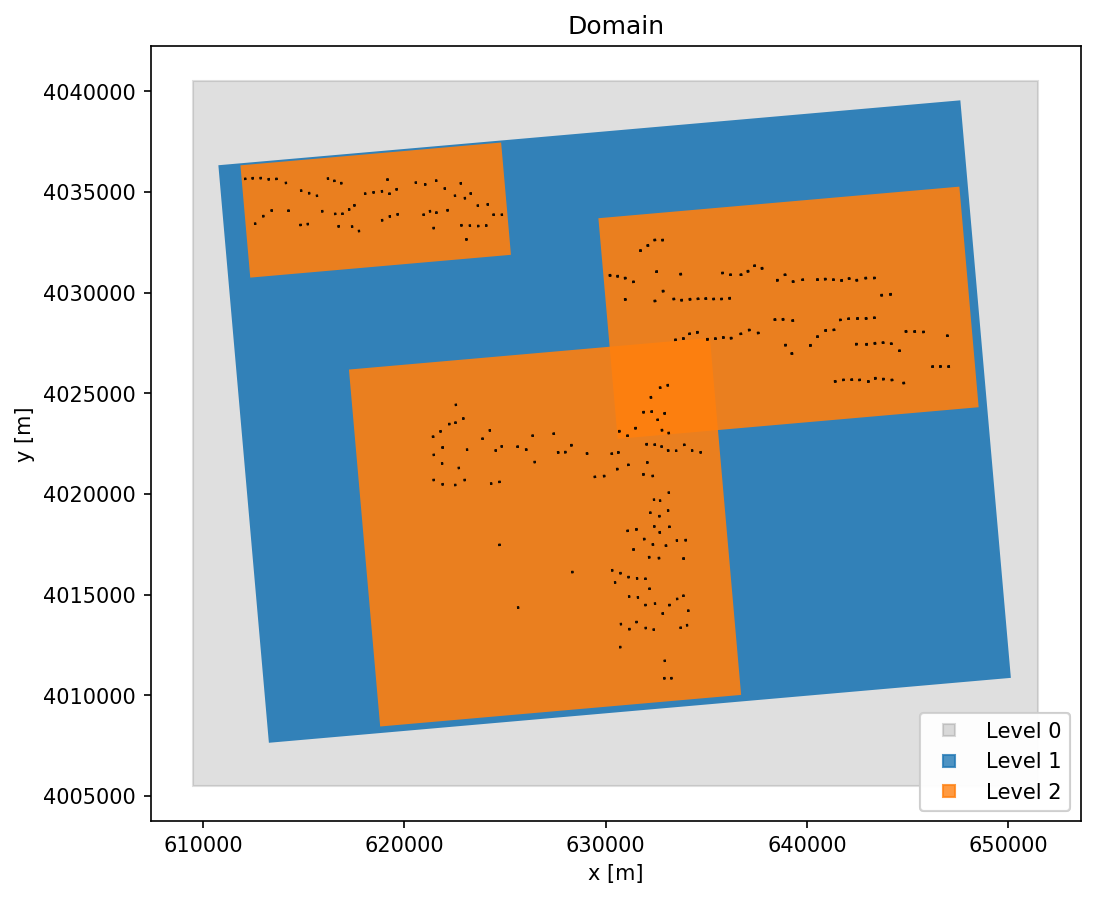

In [61]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = False
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XY'
case.plotDomain(ax=ax)
ax.axis('scaled')

(607400.0, 653600.0, -40.0, 840.0)

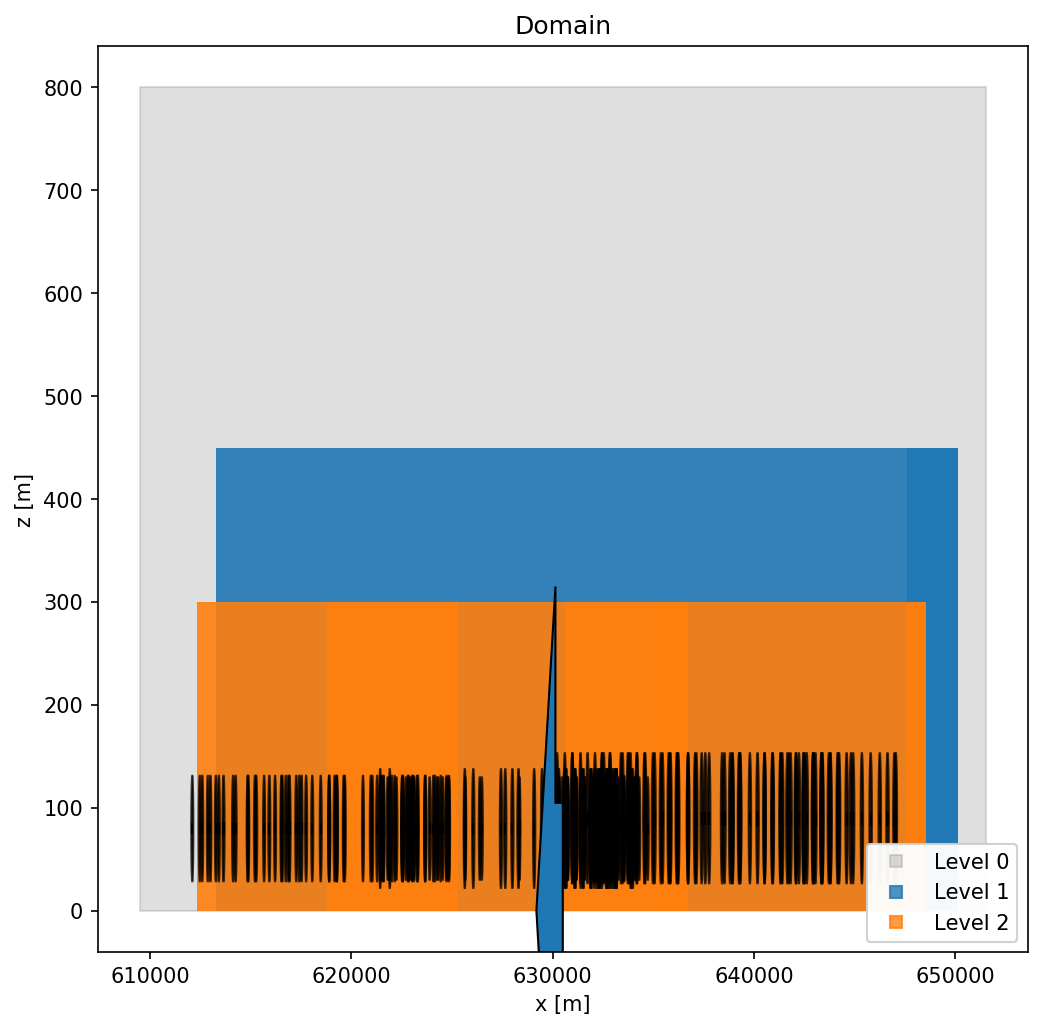

In [62]:
# Plot the domain (total domain)
fig, ax = plt.subplots(figsize=(8,8), facecolor='w', dpi=150)
case.popup_storteddata['plotdomain']['plot_turbines']        = case.listboxpopupwindict['listboxactuator'].getitemlist()
case.popup_storteddata['plotdomain']['plot_refineboxes']     = case.listboxpopupwindict['listboxtagging'].getitemlist()
case.popup_storteddata['plotdomain']['plot_windnortharrows'] = True
case.popup_storteddata['plotdomain']['plot_chooseview']      = 'XZ'
case.plotDomain(ax=ax)
ax.axis('auto')

In [63]:
# Estimate mesh size
case.estimateMeshSize(verbose=False)

ESTIMATED MESH SIZE
   Level       Ncells                      Cell Size
       0   1176000000             10.0 x 10.0 x 10.0
       1   3836160000                5.0 x 5.0 x 5.0
       2  11351040000                2.5 x 2.5 x 2.5
  TOTAL:  16363200000


In [58]:
## Write the input file
print(case.writeAMRWindInput(''))

# --- Simulation time control parameters ---
time.stop_time                           = 100.0               # Max (simulated) time to evolve [s]
time.max_step                            = -1                  
time.fixed_dt                            = 0.1                 # Fixed timestep size (in seconds). If negative, then time.cfl is used
incflo.physics                           = FreeStream Actuator # List of physics models to include in simulation.
incflo.verbose                           = 0                   
io.check_file                            = chk                 
incflo.use_godunov                       = true                
incflo.godunov_type                      = weno_z              
incflo.gravity                           = 0.0 0.0 -9.81       # Gravitational acceleration vector (x,y,z) [m/s^2]
incflo.density                           = 1.0                 # Fluid density [kg/m^3]
transport.viscosity                      = 1.872e-05           # Fluid dynamic visco